In this notebook, we will explore probability distribution, or functions that give the likelihood that some outcome will occur for every possible state. 

<BarContainer object of 6 artists>

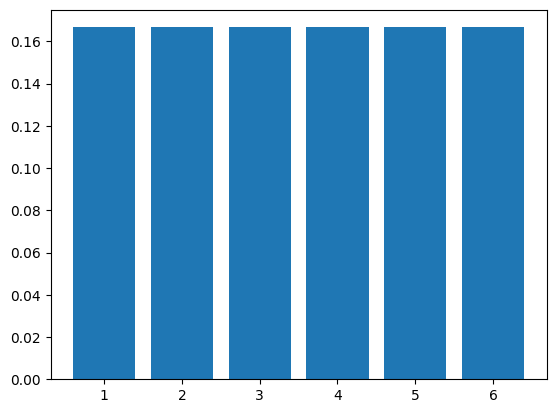

In [2]:
# Let's look at a canonical example: a die roll. 
# Assuming a fair die, there is a 1/6 chance of it landing on any particular side



import matplotlib.pyplot as plt

plt.bar(list(range(1,7)), [1/6 for i in range(6)])


In this case we only have a fixed number of outcomes. But, what if we have a 12-sided die?
For a 12-sided die? Or a million? The probability of getting any particular number would get closer and closer to zero,
and it's almost as if we're working with continous data. 

In other words, it becomes equally likely for some random variable X to take on outcomes somewhere between a range of values.
Then, we'd end up with something called a uniform distribution, which looks like a flat top:

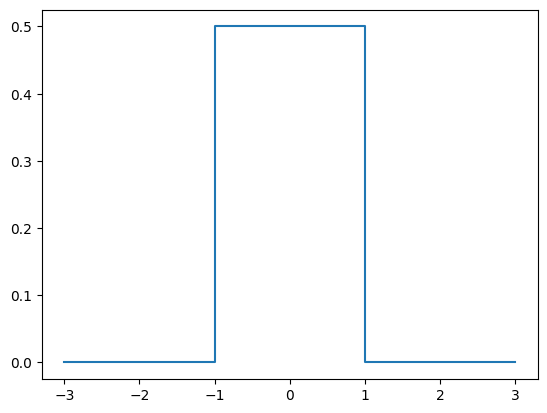

In [3]:
# Normal distribution between 0 and 1

import numpy as np

start = -1
stop = 1
x_range = stop - start
n = 10

# Concatenate the three lists together. One for each portion of the distribution: where y is 0 before the specified
# starting value, where y is 1 between our selected range of values, and where y is 1 after our stopping value.

x = list(np.linspace(start - x_range, start, n+1)) + \
    list(np.linspace(start, stop, n+1)) + \
    list(np.linspace(stop, stop + x_range, n+1))

y = [0 for i in range(n+1)] + [1/(x_range) for i in range(n+1)] + [0 for i in range(n+1)]

plt.plot(x, y)

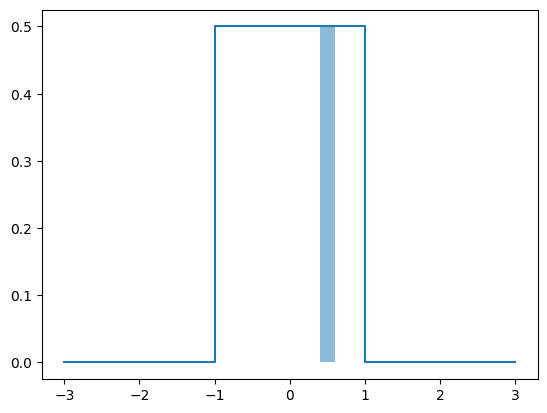

In [4]:
# Say we want to know what the probability is at exactly x = 0.5? The answer would be zero! so a better question, 
# What's the probability of getting a value between 0.4 and 0.6? This would simply be the area under the curve between 0.4 and 0.6


import math

plt.plot(x, y)
plt.fill_between([0.4,0.6], 0.5, alpha=0.5)


$Area = width * height$

The plot is an example of probability density function, which has the important property that every y=probability, corresponding to some x, must be between 0 and 1. Also, the total area under the curve MUST sume to one. After all, we're 100% guaranteed to land on "some" possible state. The probability of an outcome between a give range is the following. 

$$P(a < X < b) = \int_{a}^{b} pdf(x)dx$$

The main idea is that the probability that a random variable takes on a value between some range, is simply the area under that part of the curve.

### Cumulative distribution function

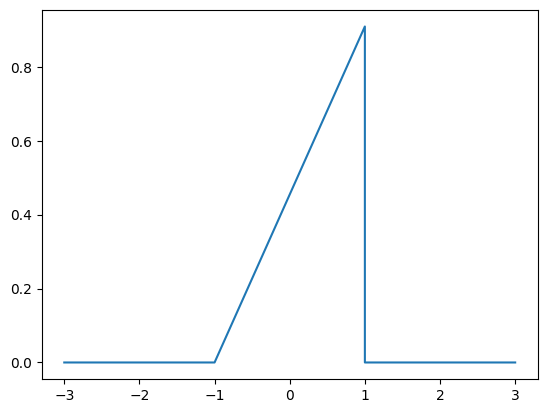

In [5]:
# This function "accumulates" the probability and gives you the total probability of being less than or equal to some value.
# Given the example above, at -1, we've accumulated zero probability, since(P <= -1) = 0.
# The probability at 1 is 100%

y_cdf = [0 for i in range(n+1)] + [i/(n+1) for i in range(n+1)] + [ 0 for i in range(n+1)]
plt.plot(x, y_cdf)


# Below is what the probability would look like. 

While a uniform distribution is easy to work with, in many practical applications, it's unlikely that every outcome will occur with equal probability. For instance, we could fabricate some weighted dice. 

<BarContainer object of 6 artists>

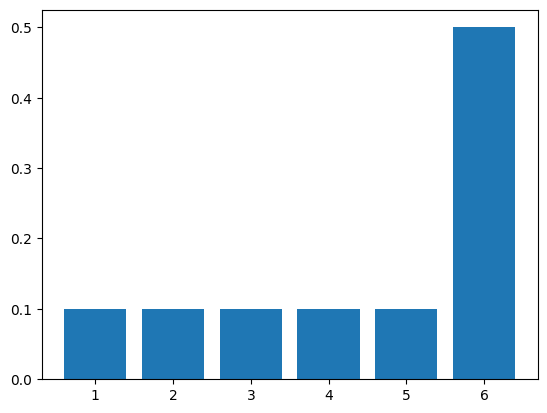

In [6]:
plt.bar(list(range(1,7)), [1/10 if i !=5 else 1/2 for i in range(6)])

It's not often we come across a weighted coin, but there are many situations that are analogous to flipping a weighted coin. For instance, let's say we run a company that produces battery packs, and we know that historically roughly three in a 1,000 is defective. This is essentially flipping a weighted coin, where p equals 0.003 probability of defect, and 1 minus p equals 0.997, probability of working product.

This simple distribution with two outcomes is known as a Bernoulli distribution. However, we want to know how likely it is for each of us to get more than 50 defects out of our total batch of 10,000 batteries. To answer this, we can turn to the binomial distribution. The PDF is shown above where p is the probability of success, or in our case, we're defining success as a defect. N is the total number of trials, and k is the number of successes.



Text(0, 0.5, 'P(l: n, p)')

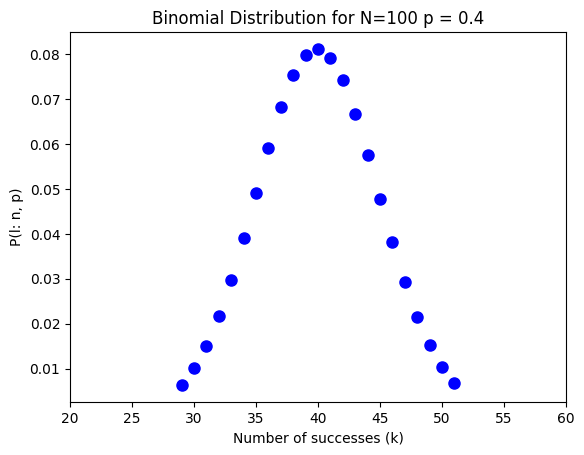

In [7]:
# Just a sample problem

import scipy.stats as stats
from scipy.stats import binom

n, p = 100, 0.4

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
plt.xlim(20,60)
plt.title('Binomial Distribution for N=100 p = 0.4')
plt.xlabel('Number of successes (k)')
plt.ylabel("P(l: n, p)")

In [8]:
# Going back to the original problem of the batteries

print("P(50; 10000, 0.003) = ", binom.pmf(50,10000, 0.003))
print("Probability of getting more than 50 defects:", 1 - binom.cdf(50,10000,0.003))

P(50; 10000, 0.003) =  0.00021703210906333384
Probability of getting more than 50 defects: 0.00029143649404927974


### Normal Distributions

You may have noticed that the binomial distribution looks pretty similar to a normal distribution (bell curve). However, there are a few key differences. For starters, one is a discrete distribution while the other is continuous. But, in a similar procedure discussed in the uniform distribution section above, if we let $N \rightarrow \infty$ or become sufficiently large, the binomial distribution can be roughly approximated by a normal distribution with the following mean and variance:

$$N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
where
$$\mu = np$$
and 
$$\sigma^2 = np(1-p)$$

For reference:

Normal Distributions:
    - Continuous and account for any possible outcomes along the number line.

Discrete Distrubtions:
    - constructed from data that can only follow a finite or discrete set of outcomes.

P(x<35) =  0.4174843531794775


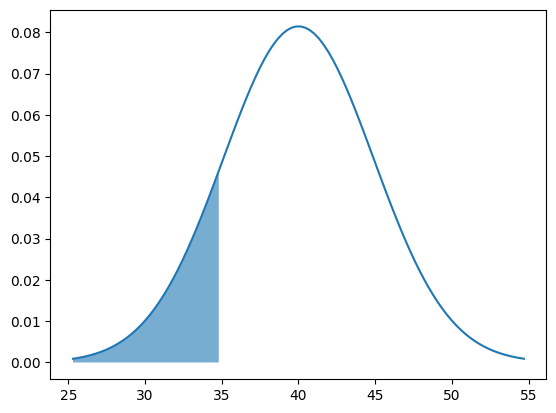

In [9]:
# Let's plot the pdf for the normal distribution and calculate some simple statistics.
# if we use the parameters n=100 and p=0.4 from before ...

mu = n*p
variance = n* p * (1-p)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# Comparing this to what we had before ... its pretty close! 

prob = stats.norm.cdf(35, mu, variance)
print('P(x<35) = ', prob)
x_vals= x[x<35]
plt.fill_between(x_vals, 0, stats.norm.pdf(x_vals, mu, sigma), alpha=0.6)


### Population versus samples: t-Distribution

In the case above, we somehow magicaally knew the firm's mean number of defects and standard deviation. In that case, looking at a normal distribution is appropriate. Another random variable that's normally distributed might be people's heights. If we ask everyone in the world to report their height, we could compute a mean and standard deviation for the entire population.

Unfortunately, in most cases, it's probably not feasable to ask every single person we're interested in. Instead, we can only take samples of the whole population. IN these cases, we would want to draw inferences not with a normal distribution, but by using something called a t-distibrution.

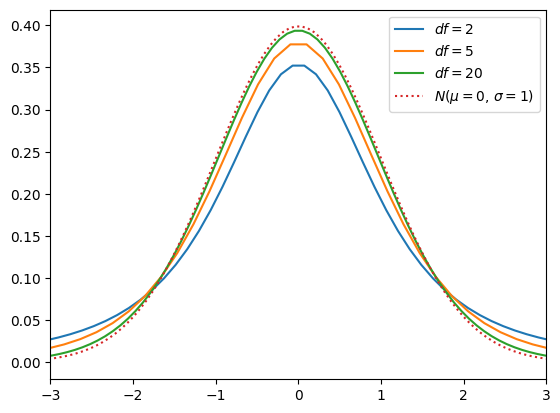

In [13]:
# The t-distribution takes in a parameter df, which stands for degrees of freedome.
# This is equal to the sample size minus 1.

rv1 = stats.t(df=2)
x1 = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 1000)
y1 = rv1.pdf(x1)

rv2 = stats.t(df=5)
x2 = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
y2 = rv2.pdf(x2)

rv3 = stats.t(df=20)
x3 = np.linspace(rv3.ppf(0.0001), rv3.ppf(0.9999), 100)
y3 = rv3.pdf(x3)

rv4 = stats.norm()
x4 = np.linspace(rv4.ppf(0.0001), rv4.ppf(0.9999), 100)
y4 = rv4.pdf(x4)


plt.xlim(-3,3)
plt.plot(x1,y1, label="$df=2$")
plt.plot(x2,y2, label="$df=5$")
plt.plot(x3,y3, label="$df=20$")
plt.plot(x4,y4, ":", label="$N(\mu=0$, $\sigma=1)$")
plt.legend()
